In this workbook, we explore a few points related to intercepts and t-values.

In [1]:
import numpy as np
import numpy.random as npr

# For plotting

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

About intercepts: The word intercept comes from the traditional (row view) view of writing the target of the $k'$th example, $y_k$ in terms of the $p$ features $x_{k,1},\ldots, x_{k,p}$ as follows:

$$y_k \sim \sum_{i=1}^p \beta_i x_{k,i} + \beta_0. \tag*{(1)}$$

We write $\sim$, not $=$, because while we model $y_k$ as the expression on the right---we usually cannot make it an equality for all $k$. The subscript $k$ above refers to the example number, the subscript $i$ refers to the feature number. In matrix form, if we have $n$ examples, we will write the above equation compactly as:
$$ {\bf y} \sim {\bf X} {\bf \beta} + \beta_0 {\bf 1},$$
where ${\bf y} = (y_1,\ldots, y_n)$, the matrix ${\bf X}$ has dimensions $n\times p$, where the $k,i$'th element is $x_{k,i}$ in equation (1) above, the vector ${\bf \beta} = (\beta_1,\ldots, \beta_p)$ and the vector ${\bf 1} = (1,\ldots 1)$, where all vectors are understood to be column vectors.

The intercept here is $\beta_0$. Part of the confusion comes from the notation---in machine learning, we prefer to think of the linear space of the features (the columns of $\bf X$), not in terms of rows as in equation (1). Regardless, if $\beta_0$ is set to 0, we will say we are not using an intercept, ie we model

$$ {\bf y} \sim {\bf X} {\bf \beta}. $$

Here, the story is pretty simple---we project $\bf y$ into the column space of $\bf X$. Equivalently, we are thinking of the linear space formed by the linear combinations of the columns of ${\bf X}$. If there are $n$ examples, this is a linear space formed by all possible linear combinations of $p$ vectors, each of whom has $n$ coordinates. Some amount of confusion may have crept in because of some of the pictures I used before (where unfortunately, visualization forced me to use n and p to be 2 or 3). 

Using one of the prior examples, we have 
$$ X = \begin{bmatrix} 2 & 1\\ -1 & 0 \\ 1 & 1 \end{bmatrix}$$

which means we have 2 features ($p=2$) and 3 examples. We plotted the plane containing the linear combination of these features, and we said this plane is ${\bf w }\cdot {\bf x} = 0$, where ${\bf w } = (-1,-1,1)$. The vector, little $\bf x$ here, must NOT be interpreted as a single example, but rather as a generic vector in the space of all linear combinations of the columns of ${\bf X}$, or space of linear combinations of the features (so a vector that captures a specific feature value across all examples). The columns of ${\bf X}$ are plotted in black below, and ${\bf w}$ in red. 

Note that ${\bf w}$ is NOT analogous to $\beta$ in equation (1). This may have been one of the points of confusion. In fact, there is no  way to see ${\bf w}$ from any subset of the examples, you need them all to get ${\bf w}$. The following assignment will make this clear. This picture below, our prefered view for machine learning, is the COLUMN picture for the regression without an intercept.


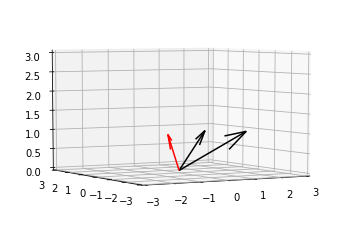

In [2]:
# For coding ease (2,-1,1) and (1,0,1) are written as rows of the matrix below, so we call the matrix Xt (for X transpose)

Xt = np.array([[2, -1, 1],[1,0,1]])

# Let us plot these vectors:

# zip below reads u row-wise and assigns in turn to X, Y, Z. So X contains
# 1st coordinate of the two vectors, Y contains the 2nd coordinate
# and Z contains the 3rd coordinate. print(X) below 
# to see what has happened with the zip command. 
x, y, z = zip(*Xt)


origin = [[0],[0],[0]]

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.quiver(*origin, x,y,z, color=['black','black'])
plt.quiver(*origin, -1, -1, 1,color=['red'])

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
ax.view_init(5,240)


What if we wanted an intercept? Then, we have

$$ {\bf y} \sim {\bf X} {\bf \beta} + \beta_0 {\bf 1},$$

which means we want to write ${\bf y}$ as a linear combination of the columns of ${\bf X}$ and the vector ${\bf 1}$. Equivalently, we can just pretend that our data matrix was $\tilde X= [ {\bf X}; {\bf 1} ]$---namely stack $X$ and a column of 1s to get the matrix $\tilde X$. 

In our example,  namely a new matrix whose first two columns are as before, while the last column is all 1. Let us plot the three columns of $\tilde X$ below


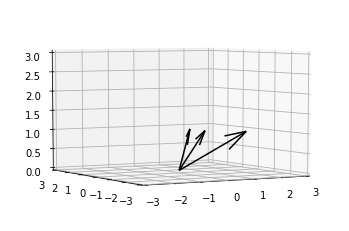

In [3]:
#For coding ease (2,-1,1) and (1,0,1) are written as rows of the matrix below, so we call the matrix Xt (for X transpose)

tildeXt = np.array([[2, -1, 1],[1,0,1],[1,1,1]])

# Let us plot these vectors:

# zip below reads u row-wise and assigns in turn to X, Y, Z. So X contains
# 1st coordinate of the two vectors, Y contains the 2nd coordinate
# and Z contains the 3rd coordinate. print(X) below 
# to see what has happened with the zip command. 
x, y, z = zip(*tildeXt)

origin = [[0],[0],[0]]

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.quiver(*origin, x,y,z, color=['black','black','black'])

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
ax.view_init(5,240)


So now, we no longer plot the red vector. We are interested in all linear combinations of the three vectors, and here the three vectors are linearly independent. They span the entire three dimensional space. In this case, where we now have 2 features linearly independent from (1,1,1) and an intercept with three examples, any target can be perfectly captured. Of course, if you
had 4 examples, the 2 features and the intercept would no longer be sufficient to perfectly capture any target. 

1a. In the cell below, using the LinearRegression module from sklean.linear_models, pick n=50 and p=49. Use a randomly generated matrix X with size n x p as your data such that (1,...,1) is not in the column space of X. 
1b. Now show that  (i) for a randomly chosen target, the error is 0 if you use an intercept, and (ii) find a target such that error is non-0 if you do not use an intercept. 

2. Pick n=50 and p > n-1. Show that for any randomly chosen target and data of size n x p, the error is 0 whether or not you use an intercept.

3. Pick n=50 and p < n-1 and randomly choose a data matrix of size n x p. (i) Pick a target such that linear regression gives you an error 0 with an intercept but non-zero error without an intercept, (ii) a target such that linear regression gives you an error 0 without an intercept (therefore you get 0 error with an intercept also---why?) and (iii) a non-zero error whether or not you use an intercept.

In [4]:
############################
## 1: a
############################
from sklearn import datasets, linear_model
print("============(1-a)============")
# since we want to populate randomly, import the random library
import random

##############
## X
#############
rand_array = np.zeros((50, 49), np.int)
for x in np.nditer(rand_array, op_flags = ["readwrite"]): 
    x[...] = random.randint(0, 1)
X = rand_array
print(X)
############################
## 1: b (i)
############################
print("============(1-b-i)============")
#############
## b
#############

rand_array = np.zeros((50, 1), np.int)
for x in np.nditer(rand_array, op_flags = ["readwrite"]): 
    x[...] = random.randint(0, 1)
b = rand_array

reg = linear_model.LinearRegression()

reg_interception = reg.fit(X,b)

output = np.sum((reg_interception.predict(X) - b)**2)

print("Reg with Interception = ", output)

############################
## 1: b (ii)
############################
print("============(1-b-ii)============")
#############
## B
#############

rand_array = np.zeros((50, 1), np.int)
B = rand_array

reg = linear_model.LinearRegression(fit_intercept=False)

reg_interception = reg.fit(X,B)

output = np.sum((reg_interception.predict(X) - B)**2)

print("Reg without Interception = ", output)

============(1-a)============
[[0 0 0 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [1 0 1 ... 1 1 1]
 ...
 [0 1 0 ... 0 0 1]
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 0 1 0]]
============(1-b-i)============
Reg with Interception =  1.817338310402906e-28
============(1-b-ii)============
Reg without Interception =  0.0


In [5]:
############################
## 2: 
############################
print("============(2)============")
##############
## A
#############
rand_array = np.zeros((50, 60), np.int)
for x in np.nditer(rand_array, op_flags = ["readwrite"]): 
    x[...] = random.randint(0, 1)
A = rand_array

##############
## C
#############
rand_array = np.zeros((50, 1), np.int)
for x in np.nditer(rand_array, op_flags = ["readwrite"]): 
    x[...] = random.randint(0, 1)
C = rand_array

#############
## With interception
#############
reg = linear_model.LinearRegression()

reg_interception = reg.fit(A,C)

output = np.sum((reg_interception.predict(A) - C)**2)

print("Reg with Interception = ", output)

################
## Without INtercept
###############
reg = linear_model.LinearRegression(fit_intercept=False)

reg_interception = reg.fit(A,C)

output = np.sum((reg_interception.predict(A) - C)**2)

print("Reg without Interception = ", output)

print("\nThe reason why we also get an 0 error with an intercept is because we forced it to be a linear model y = a+bx with a = 0. Thus, it will always go through the origin.")

============(2)============
Reg with Interception =  1.141013343692329e-28
Reg without Interception =  3.7982131101735653e-28

The reason why we also get an 0 error with an intercept is because we forced it to be a linear model y = a+bx with a = 0. Thus, it will always go through the origin.


In [6]:
print("============(3)============")
############################
## 3: (i)
############################
print("============(i)============")
##############
## Y
#############
rand_array = np.zeros((50, 40), np.int)
for x in np.nditer(rand_array, op_flags = ["readwrite"]): 
    x[...] = random.randint(0, 1)
Y = rand_array

##############
## d
#############
rand_array = np.full((50, 1), 1)
d = rand_array

#############
## With interception
#############
reg = linear_model.LinearRegression()

reg_interception = reg.fit(Y,d)

output = np.sum((reg_interception.predict(Y) - d)**2)

print("Reg with Interception = ", output)

################
## Without INtercept
###############
reg = linear_model.LinearRegression(fit_intercept=False)

reg_interception = reg.fit(Y,d)

output = np.sum((reg_interception.predict(Y) - d)**2)

print("Reg without Interception = ", output)

############################
## 3: (ii)
############################
print("============(ii)============")
##############
## Y
#############
rand_array = np.zeros((50, 40), np.int)
for x in np.nditer(rand_array, op_flags = ["readwrite"]): 
    x[...] = random.randint(0, 1)
Y = rand_array

##############
## d
#############
rand_array = np.zeros((50,1))
d = rand_array

#############
## With interception
#############
reg = linear_model.LinearRegression()

reg_interception = reg.fit(Y,d)

output = np.sum((reg_interception.predict(Y) - d)**2)

print("Reg with Interception = ", output)

################
## Without INtercept
###############
reg = linear_model.LinearRegression(fit_intercept=False)

reg_interception = reg.fit(Y,d)

output = np.sum((reg_interception.predict(Y) - d)**2)

print("Reg without Interception = ", output)

print('\nSince [0...0] is within the column space of X, our target produces an error of 0 whether or not an intercept is used')


############################
## 3: (iii)
############################
print("============(iii)============")
##############
## Y
#############
rand_array = np.zeros((50, 40), np.int)
for x in np.nditer(rand_array, op_flags = ["readwrite"]): 
    x[...] = random.randint(0, 1)
Y = rand_array

##############
## d
#############
rand_array = np.zeros((50, 1), np.int)
for x in np.nditer(rand_array, op_flags = ["readwrite"]): 
    x[...] = random.randint(0, 1)
d = rand_array

#############
## With interception
#############
reg = linear_model.LinearRegression()

reg_interception = reg.fit(Y,d)

output = np.sum((reg_interception.predict(Y) - d)**2)

print("Reg with Interception = ", output)

################
## Without INtercept
###############
reg = linear_model.LinearRegression(fit_intercept=False)

reg_interception = reg.fit(Y,d)

output = np.sum((reg_interception.predict(Y) - d)**2)

print("Reg without Interception = ", output)

============(3)============
============(i)============
Reg with Interception =  0.0
Reg without Interception =  0.28877998784397874
============(ii)============
Reg with Interception =  0.0
Reg without Interception =  0.0

Since [0...0] is within the column space of X, our target produces an error of 0 whether or not an intercept is used
============(iii)============
Reg with Interception =  1.926175932005266
Reg without Interception =  2.1387395965904306


Let us look at the row view now. Take the matrix 
$$ X = \begin{bmatrix} 2 & 1\\ -1 & 0 \\ 1 & 1 \end{bmatrix}$$

and choose a random target (3x1 vector). 

1. Make a scatterplot of three examples below, namely plot the points (2,1,y_1), (-1,0,y_2) and (1,1,y_3). Note that these are not the same black vectors from the column view. 

2. Run a linear regression for the target with the data X without an intercept, and let $\beta$ be the vector coefficients you get (what is size of $\beta$ then?). Plot the plane $y - \beta \cdot x =0$ (x is a vector with the same size as $\beta$).

3. What is the distance of each point from the plane you plot? Is what you are minimizing the sum of squares of distances to the plane? (The answer is actually no---it is related but something else. Explain).

Note the distinction here. In the column view, we wanted to minimize the the distance of the single target from the feature space. Here the story is more muddled---each point is an example, and you want a plane that minimizes some notion (but not what we would normally think as distance) of distance to the plane. This is why we never look at the row view too much, but the word intercept has stuck from this perspective.


============(1)============
[[ 2  1  1]
 [-1  0  2]
 [ 1  1 -1]]
(2, -1, 1) (1, 0, 1) (1, 2, -1)


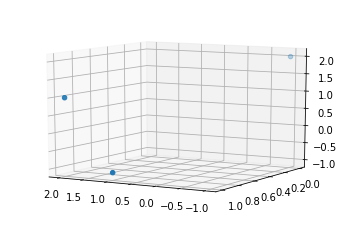

In [7]:
####################
## 1
####################
print("============(1)============")
plot = np.array([[2, 1],[-1, 0], [1, 1]])

target = np.array([1, 2, -1]).reshape((3,1))

plot_target = np.insert(plot, [2], target, axis=1)

print(plot_target)

x, y, z = zip(*plot_target)

print(x,y,z)

origin = [[0],[0],[0]]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x,y,z)

ax.view_init(10,120)

============(2)============
Size of β = 1x2
[[ 1]
 [ 2]
 [-1]]

[[-0.66666667  1.        ]]


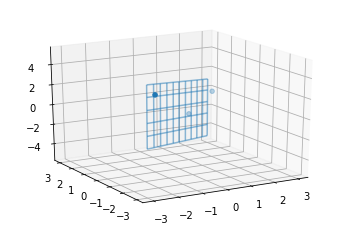

<Figure size 432x288 with 0 Axes>

In [8]:
####################
## 2
####################
print("============(2)============")
print("Size of β = 1x2")
reg = linear_model.LinearRegression(fit_intercept=False)

reg_interception = reg.fit(plot,target)

β = reg_interception.coef_

print(target)
print()
print(β)

x, y, z = zip(*plot_target)

origin = [[0],[0],[0]]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x,y,z)

X1 = np.linspace(-3,3,100) # in x space, 100 pts
X2 = np.linspace(-3,3,100) # in y space, 100 pts

w1, w2 = np.meshgrid(X1,X2)

y = np.add(β[0,0]*w1, β[0,1]*w2)

fig = plt.figure()
ax.plot_wireframe(X1,X2,y,rstride=20,cstride=10,alpha=0.5)

ax.view_init(20,240)

In [9]:
####################
## 3
####################
print("============(3)============")

n = np.append(1, -1*β) 
print(n)
n = n / np.linalg.norm(n)

print(f'Distance between {plot_target.T[0,:]} -> {n.dot(plot_target.T[0,:])}')
print(f'Distance between {plot_target.T[1,:]} -> {n.dot(plot_target.T[1,:])}')
print(f'Distance between {plot_target.T[2,:]} -> {n.dot(plot_target.T[2,:])}')


============(3)============
[ 1.          0.66666667 -1.        ]
Distance between [ 2 -1  1] -> 0.21320071635561166
Distance between [1 0 1] -> 7.771561172376096e-16
Distance between [ 1  2 -1] -> 2.132007163556104


Now if you want to allow intercepts, you have planes of form $y-\beta \cdot x = \beta_0$. 

In this case, from our prefered column view, we know for sure that there is a way to tilt the plane obtained in the picture above and shift it up so that all the points are captured. Here, it is associated with a plane that passes through the 3 points. Plot the plane in the row diagram, and verify that the coefficients of the plane you get are exactly waht you would have if

(a) you run linear regression with no intercept using the data matrix $\tilde {\bf X} = [ {\bf X}; {\bf 1} ]$

(b) you run linear regression with an intercept using just the data matrix ${\bf X}$

In [10]:
print("============(a)============")
plot_target = np.insert(plot, [2], [[1], [1], [1]], axis=1)

print(plot_target)

reg = linear_model.LinearRegression(fit_intercept=False)

reg_interception = reg.fit(plot_target,target)

c = reg_interception.coef_

print(c)
print(reg_interception.intercept_)

============(a)============
[[ 2  1  1]
 [-1  0  1]
 [ 1  1  1]]
[[ 2. -7.  4.]]
0.0


In [11]:
print("============(b)============")

reg = linear_model.LinearRegression(fit_intercept=True)

reg_interception = reg.fit(plot,target)

d = reg_interception.coef_

print(d)
print(reg_interception.intercept_)

============(b)============
[[ 2. -7.]]
[4.]


Graph


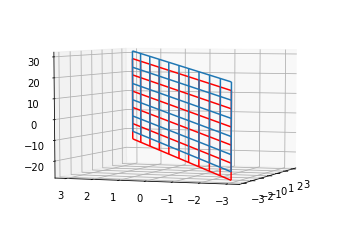

In [12]:
print("Graph")

plane = plt.figure()
ax = plt.axes(projection='3d')

X1 = np.linspace(-3,3,100) # in x space, 100 pts
X2 = np.linspace(-3,3,100) # in y space, 100 pts

# v1, v2 = np.meshgrid(X1,X2,X3)
w1, w2 = np.meshgrid(X1,X2)

z_no_int = np.add(d[0,0] * w1, d[0,1] * w2) # no intercept
z_int = z_no_int + reg_interception.intercept_ # intercept

w1, w2 = np.meshgrid(X1,X2)
ax.plot_wireframe(X1,X2,z_no_int,rstride=20,cstride=10,color="red",)
ax.plot_wireframe(X1,X2,z_int,rstride=20,cstride=10) # Plot without intercept

ax.view_init(5, 200)

Verify that the following five approaches all produce the same coefficients

1. LinearRegression with data X, target y, with intercept

2. LinearRegression with data [X; 1], target y, with no intercept (the intercept in 1 should be compared with the coefficient of the all-1 feature)

3. LinearRegression with data [X; 1], target y, but with intercept 

4. LinearRegression with centered data X', centered target y' and no intercept. Namely, let the vector mX = (sum of all rows of X)/(number of rows of X), mY = (sum of all elements of y)/(number of elements in y). Now let X' be a matrix with its (i'th row) equal to the (i'th row of X - m), and let y' be a vector with its i'th element equal to the i'th element of y -mY.
(all coefficients other than the intercept will equal the corresponding coefficients from previous version)

5. LinearRegression with centered data X' and centered target y' from before and an intercept.
(all coefficients other than the intercept will equal the corresponding coefficients from previous version)

Bonus: prove why the coefficients are the same. For 4 and 5, look at the previous worksheet on linear regression.

In [13]:
########################################
# 1
########################################
print('============(1)============')

reg = linear_model.LinearRegression(fit_intercept=True)

reg_interception = reg.fit(plot,target)

print("Coefficinet", reg_interception.coef_ )
print("Intercept", reg_interception.intercept_ )

########################################
# 2
########################################
print('============(2)============')

new_plot = np.insert(plot, [2], np.ones((3, 1)), axis=1)

reg = linear_model.LinearRegression(fit_intercept=False)

reg_interception = reg.fit(new_plot,target)

print("Coefficinet", reg_interception.coef_ )
print("Intercept", reg_interception.intercept_ )

########################################
# 3
########################################
print('============(3)============')

new_plot = np.insert(plot, [2], np.ones((3, 1)), axis=1)

reg = linear_model.LinearRegression(fit_intercept=True)

reg_interception = reg.fit(new_plot,target)

print("Coefficinet", reg_interception.coef_ )
print("Intercept", reg_interception.intercept_ )

########################################
# 4
########################################
print('============(4)============')

X = np.sum(plot, axis=0)*(1/(plot.shape[0]))
Y = np.sum(plot_target)*(1/(plot_target.shape[0]))

x_prime = plot - X
y_prime = target - Y

m = np.linalg.inv(x_prime.T @ x_prime) @ x_prime.T @ target

new_plot = np.insert(plot, [2], np.ones((3, 1)), axis=1)

reg = linear_model.LinearRegression(fit_intercept=False)

reg_interception = reg.fit(x_prime,y_prime)

print("Coefficinet", reg_interception.coef_ )
print("Intercept", reg_interception.intercept_ )

########################################
# 5
########################################
print('============(5)============')

reg = linear_model.LinearRegression(fit_intercept=True)

reg_interception = reg.fit(x_prime,y_prime)

print("Coefficinet", reg_interception.coef_ )
print("Intercept", reg_interception.intercept_ )

============(1)============
Coefficinet [[ 2. -7.]]
Intercept [4.]
============(2)============
Coefficinet [[ 2. -7.  4.]]
Intercept 0.0
============(3)============
Coefficinet [[ 2. -7.  0.]]
Intercept [4.]
============(4)============
Coefficinet [[ 2. -7.]]
Intercept 0.0
============(5)============
Coefficinet [[ 2. -7.]]
Intercept [-1.66666667]


Obtain the mnist database (use keras/any other approach/even manual download). 

1. Run a linear regression as in Class on Wed 2/19 to predict whether the label of an image is 3 or not 3. 
2. Obtain the confusion matrix, plot the roc, and find the area under the curve on the test dataset.

============(1 and 2)============


Using TensorFlow backend.


Confusion Matrix
[[8947   43]
 [ 356  654]]

 ROC Graphs


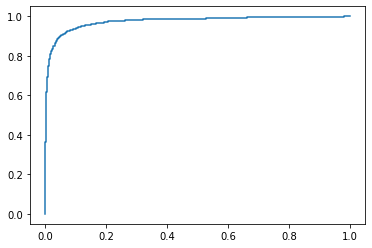

area under roc curve: 0.9738499322679767


In [14]:
###################
## 1
###################
print('============(1 and 2)============')

#import mnist
from keras.datasets import mnist
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
regr = linear_model.LinearRegression()

train = train_images.reshape(60000,28*28)

test = test_images.reshape(10000,28*28)

target = np.where(train_labels == 3,1,-1)

regr.fit(train, target)
predict_3 = regr.predict(test)

predict_labels = np.where(predict_3 > 0, 1, -1)
test_new = np.where(test_labels == 3, 1, -1)


###################
## 2 
###################
print('Confusion Matrix')
cm = confusion_matrix(test_new,predict_labels)
print(cm)

print('\n ROC Graphs')
FPR, TPR, thresholds = roc_curve(test_new, predict_3)
plt.plot(FPR,TPR)
plt.show()
# print("# of thresholds:",len(thresholds))
area_under_curve = roc_auc_score(test_new, predict_3)
print("area under roc curve:",area_under_curve)

Run Lasso on the mnist database. Lasso takes in a parameter alpha that controls the regularization (see the worksheet we did in class to see how to set this parameter). Varying it will increase or decrease the number of selected features---we will see how this works in a few weeks, but for now use it as a tuning knob to control the number of parameters. 
1. Vary alpha so you have at least 50 features, but not much larger. 
2. Use the t-test to see if you selected reasonably good parameters.
3. Now use regression using just these 50 features and compare with the brute force linear regression in the prior problem.


In [15]:
print('============(1)============')

from sklearn.linear_model import Lasso

alpha = 4.4
lassoReg = Lasso(alpha=alpha).fit(train,target)

# # of selected features
coefficients = lassoReg.coef_

print(f'With alpha: {alpha}')
print(f'We have {np.count_nonzero(coefficients)} selected features')

# Indices of selected features
selFeatures = []

for i in range(784):
    if coefficients[i] != 0:
        selFeatures.append(i) 
print('\n--------Selected Features----------')
print(selFeatures)



============(1)============
With alpha: 4.4
We have 50 selected features

--------Selected Features----------
[151, 152, 153, 177, 178, 179, 180, 181, 182, 288, 289, 290, 291, 297, 316, 317, 323, 324, 349, 350, 352, 376, 380, 409, 438, 461, 466, 485, 486, 487, 488, 489, 490, 495, 513, 514, 515, 516, 517, 518, 543, 544, 545, 550, 623, 652, 653, 654, 655, 656]


In [16]:
print('============(2)============')
import statsmodels.api as sm

X = sm.add_constant(train)
tvalOLS = sm.OLS(target, X).fit()

print(tvalOLS.summary())


============(2)============


/home/lala/snap/jupyter/common/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/lala/snap/jupyter/common/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/lala/snap/jupyter/common/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/lala/snap/jupyter/common/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     92.12
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:47:15   Log-Likelihood:                -32714.
No. Observations:               60000   AIC:                         6.685e+04
Df Residuals:                   59287   BIC:                         7.327e+04
Df Model:                         712                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9598      0.007   -128.899      0.0

Confusion Matrix
[[8990    0]
 [ 810  200]]

 ROC Graphs


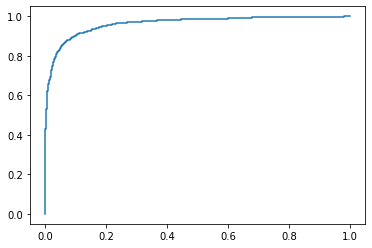

area under roc curve: 0.9621852663575591


In [17]:
test = test_images.reshape(10000,28*28)

target = np.where(train_labels == 3,1,-1)



regr.fit(train, target)
predict_3 = lassoReg.predict(test)

predict_labels = np.where(predict_3 > 0, 1, -1)
test_new = np.where(test_labels == 3, 1, -1)


###################
## 2 
###################
print('Confusion Matrix')
cm = confusion_matrix(test_new,predict_labels)
print(cm)

print('\n ROC Graphs')
FPR, TPR, thresholds = roc_curve(test_new, predict_3)
plt.plot(FPR,TPR)
plt.show()
# print("# of thresholds:",len(thresholds))
area_under_curve = roc_auc_score(test_new, predict_3)
print("area under roc curve:",area_under_curve)

We can observed that they are almost the same.